In [1]:
import json

In [2]:
%%time
all_questions = "/scratch/chaijy_root/chaijy0/heyandy/gqa_eval/val_all_questions.json"
with open(all_questions, 'r') as f:
  all_questions_dict = json.load(f)

CPU times: user 47.3 s, sys: 6.94 s, total: 54.2 s
Wall time: 54.4 s


In [3]:
len(all_questions_dict)

2011853

In [14]:
%%time
balanced_questions = "/scratch/chaijy_root/chaijy0/heyandy/gqa_eval/val_balanced_questions.json"
with open(balanced_questions, 'r') as f:
  balanced_questions_dict = json.load(f)
len(balanced_questions_dict)

CPU times: user 3.84 s, sys: 1.9 s, total: 5.74 s
Wall time: 5.84 s


132062

In [15]:
all_questions_dict['05451384']

{'semantic': [{'operation': 'select',
   'dependencies': [],
   'argument': 'cat (1324563)'},
  {'operation': 'filter color', 'dependencies': [0], 'argument': 'brown'},
  {'operation': 'relate',
   'dependencies': [1],
   'argument': 'blanket,under,s (-)'},
  {'operation': 'exist', 'dependencies': [2], 'argument': '?'}],
 'entailed': ['05451386', '05451385'],
 'equivalent': ['05451384'],
 'question': 'Are there blankets under the brown cat?',
 'imageId': '2382986',
 'isBalanced': False,
 'groups': {'global': None, 'local': '13-cat_blanket'},
 'answer': 'no',
 'semanticStr': 'select: cat (1324563)->filter color: brown [0]->relate: blanket,under,s (-) [1]->exist: ? [2]',
 'annotations': {'answer': {},
  'question': {'5:7': '1324563'},
  'fullAnswer': {'4': '1324576', '7': '1324563'}},
 'types': {'detailed': 'existRelSC',
  'semantic': 'rel',
  'structural': 'verify'},
 'fullAnswer': 'No, there is a towel under the cat.'}

In [16]:
image_id = all_questions_dict['05451384']['imageId']

In [17]:
from PIL import Image
from IPython.display import display

In [18]:
image = Image.open(f'/scratch/chaijy_root/chaijy0/heyandy/gqa_eval/images/{image_id}.jpg')

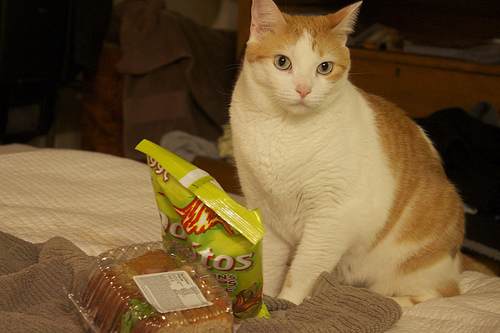

In [19]:
image

In [20]:
output = []
for k,v in balanced_questions_dict.items():
    output.append(v['answer'])
    if len(output) > 10:
        break

In [21]:
output

['parrot',
 'light blue',
 'indoors',
 'yes',
 'napkin',
 'left',
 'shore',
 'shore',
 'statue',
 'no',
 'man']

In [24]:
balanced_entailed = {}
entailed_n = 0
for k,v in balanced_questions_dict.items():
    balanced_entailed[k]=v
    for qid in v['entailed']:
        balanced_entailed[qid] = all_questions_dict[qid]
        entailed_n += 1
        
with open("/scratch/chaijy_root/chaijy0/heyandy/gqa_eval/balanced_entailed.json", 'w') as f:
    json.dump(balanced_entailed, f)

In [25]:
len(balanced_entailed)

480325

In [26]:
entailed_n

447886